In [ ]:
!pip install -U ibm-cos-sdk

In [ ]:
#Write Creds, Please use your own API creds set on write : role
cos_credentials = {
    "apikey": "",
    "cos_hmac_keys": {
        "access_key_id": "",
        "secret_access_key": ""
    },
    "endpoints": "",
    "iam_apikey_description": "",
    "iam_apikey_name": "Write",
    "iam_role_crn": "",
    "iam_serviceid_crn": "",
    "resource_instance_id": ""
}

### After you create a bucket follow these few steps
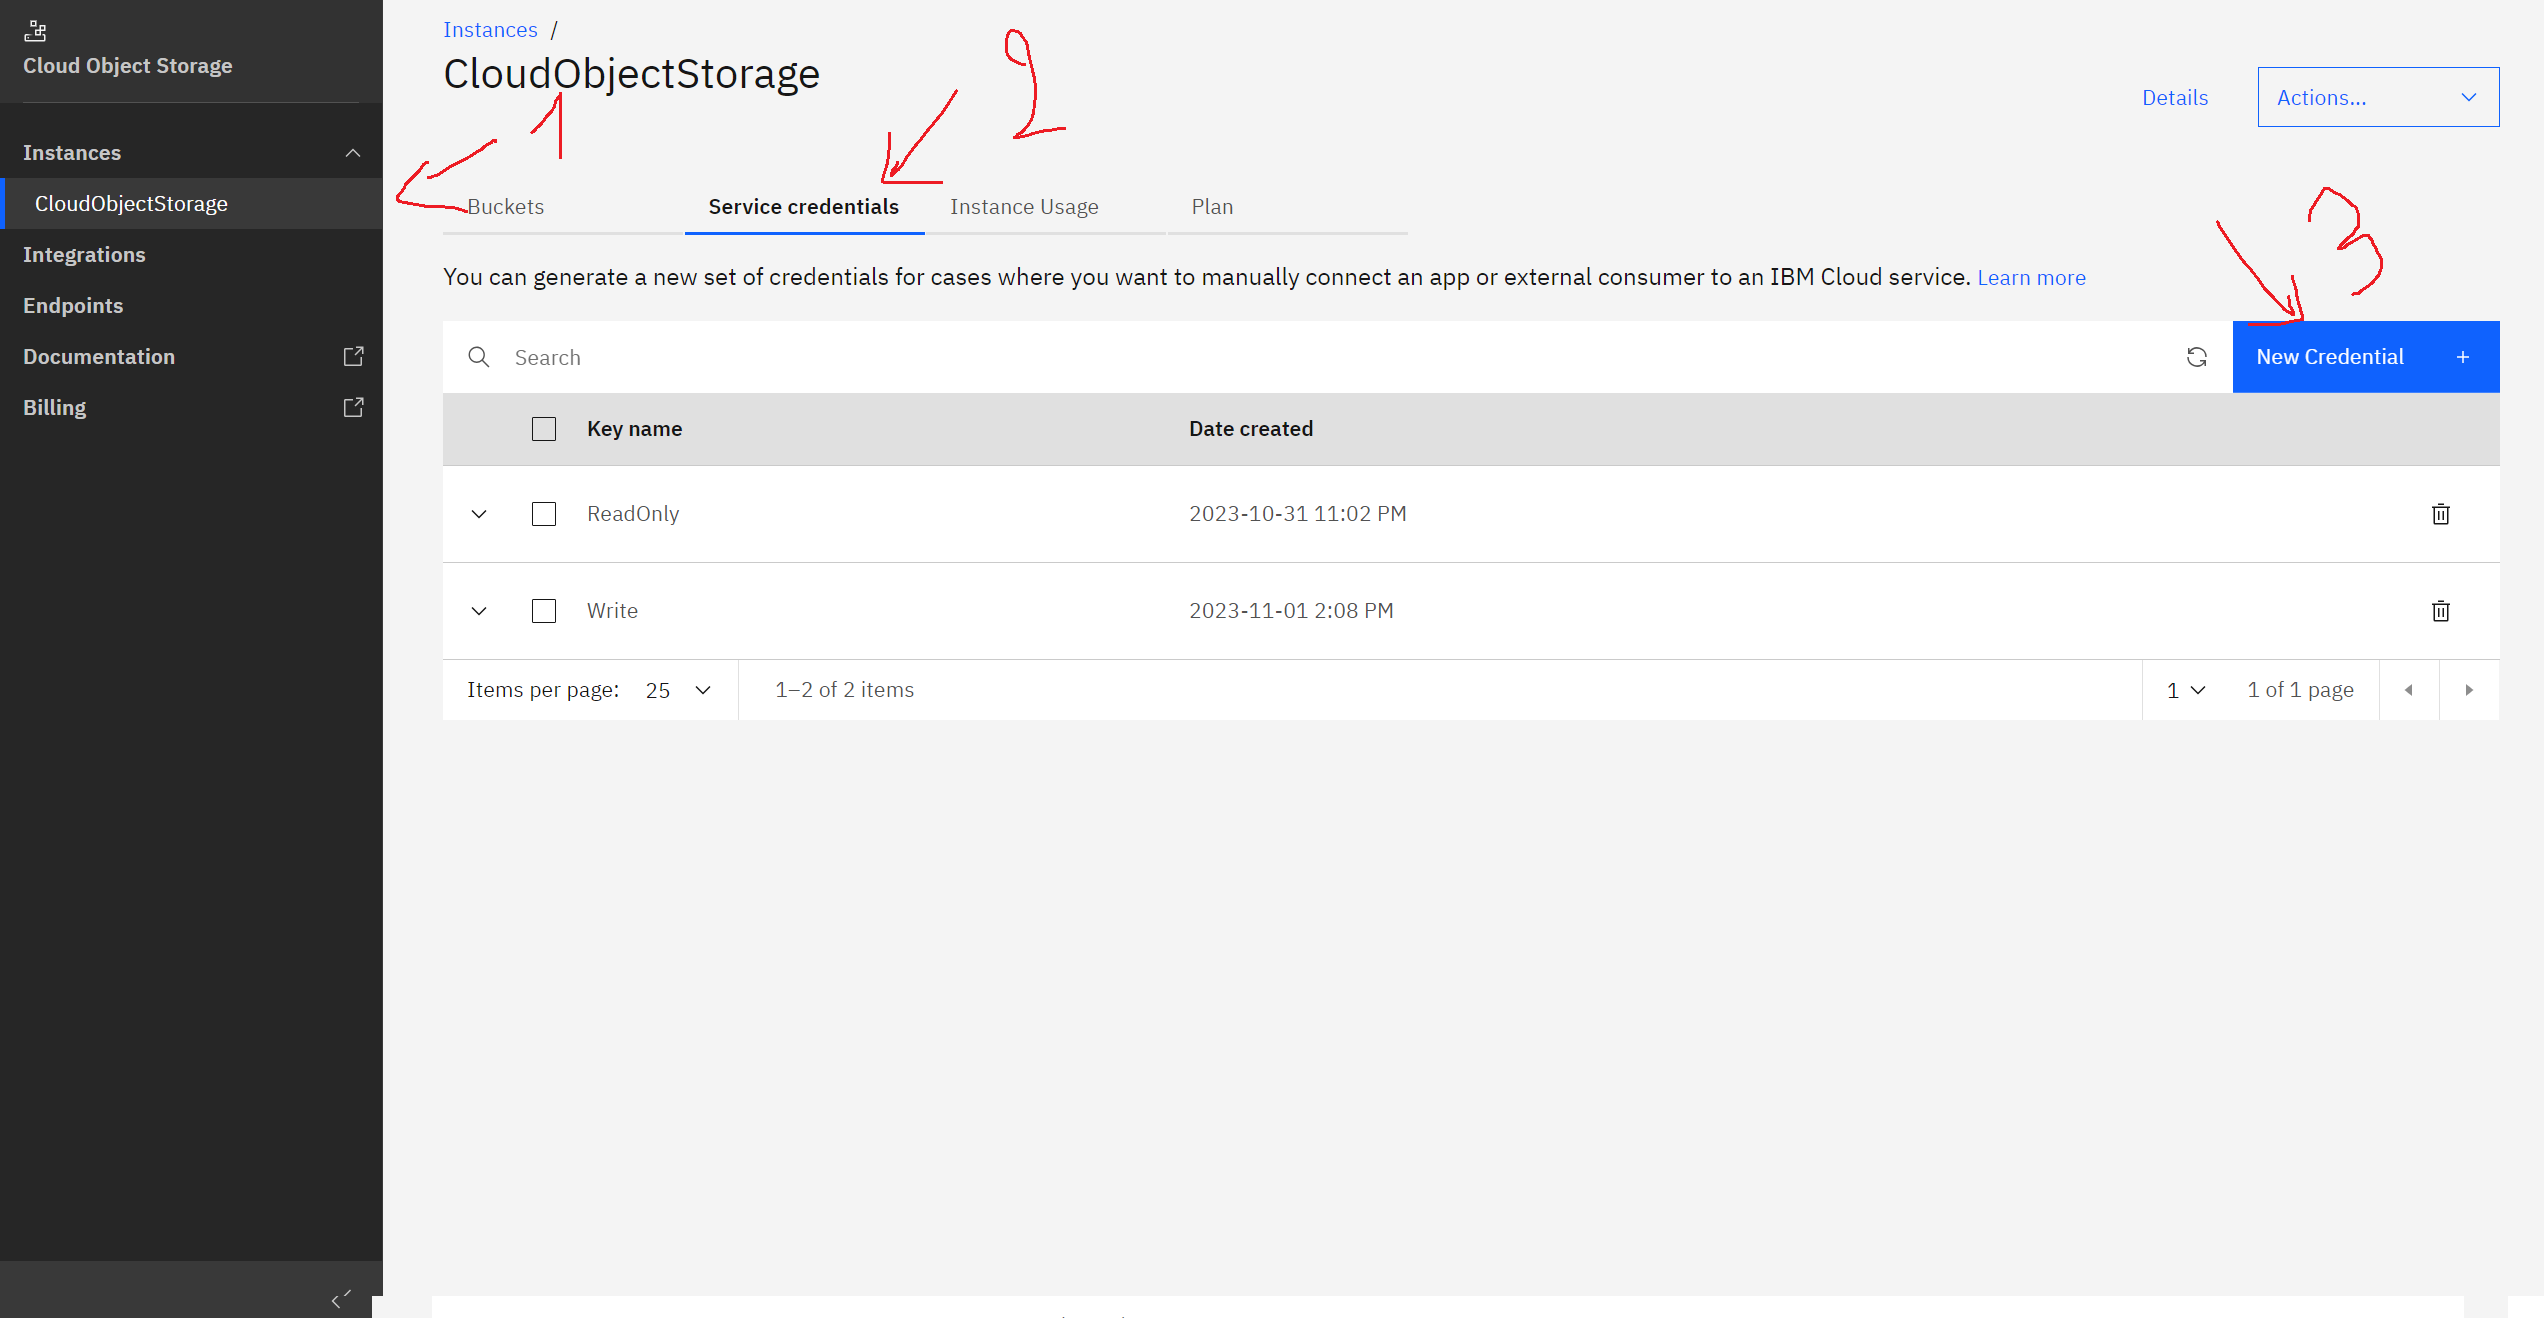
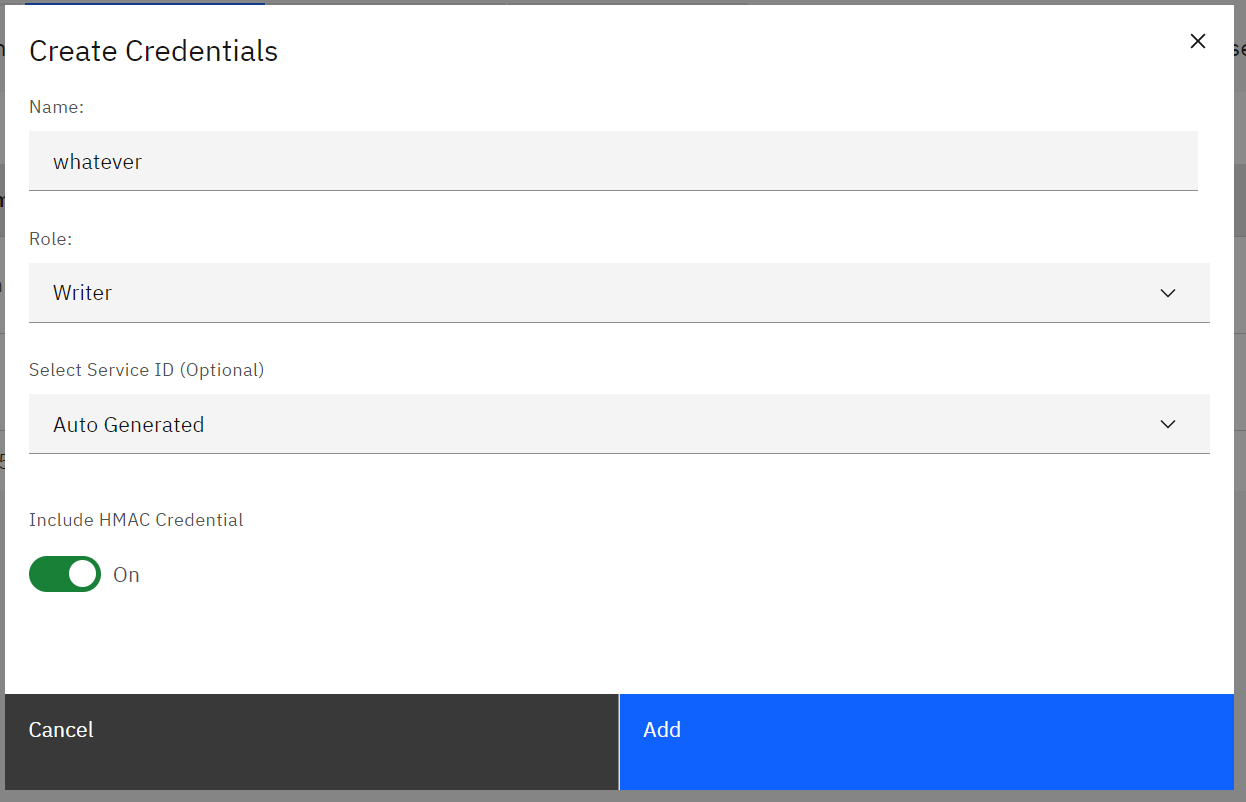
after you add it, you will see it appearing in the list :
then just copy and paste the content in the cell above 
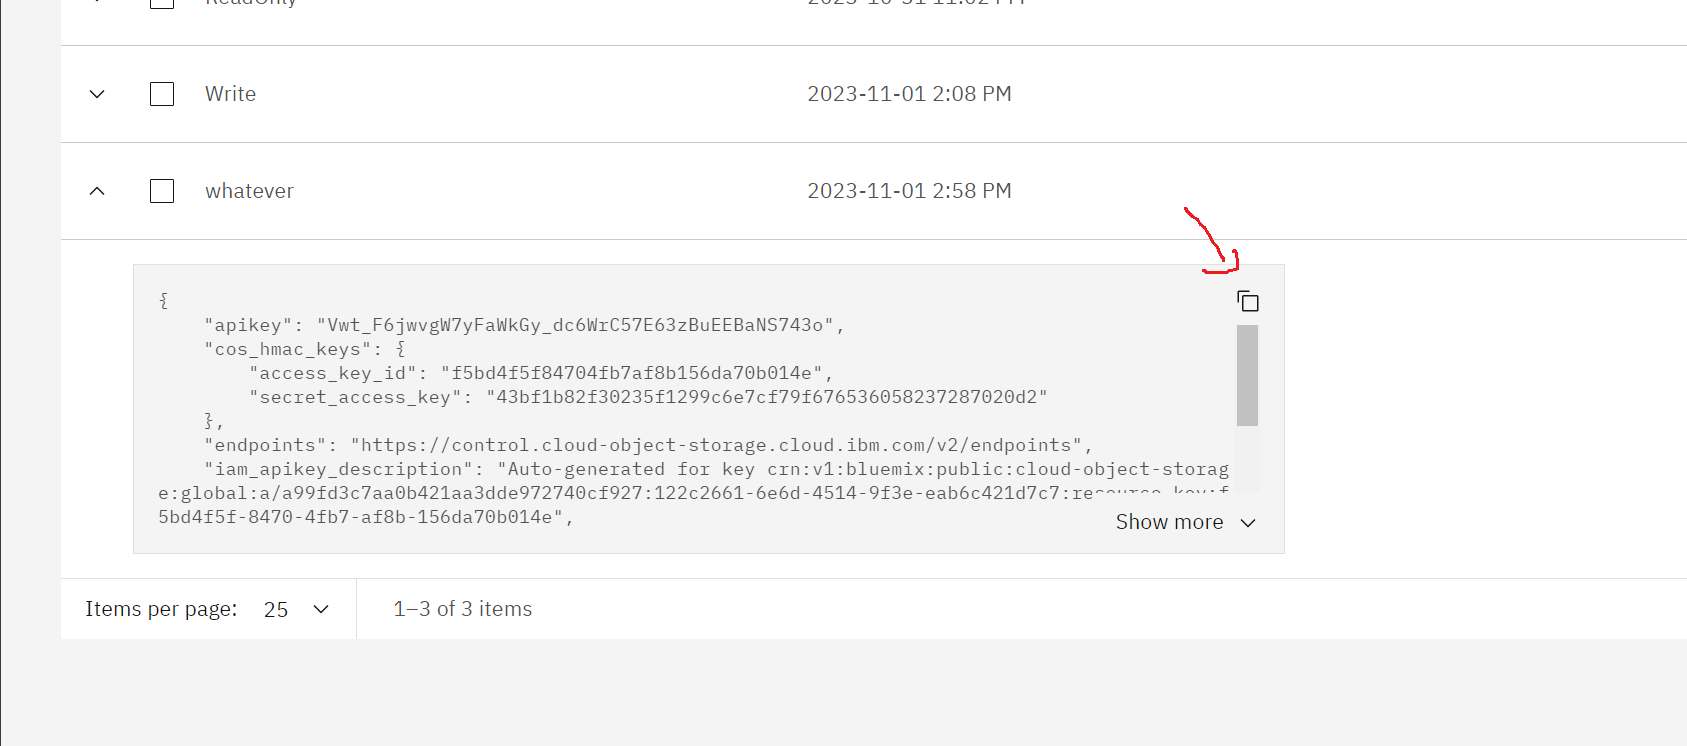


In [ ]:
# API access
import ibm_boto3
from ibm_botocore.client import Config


auth_endpoint = 'https://iam.bluemix.net/oidc/token'
service_endpoint = 'https://s3.eu-de.cloud-object-storage.appdomain.cloud' #NOTE: change this according to your region:


cos = ibm_boto3.client('s3',
                         ibm_api_key_id=cos_credentials['apikey'],
                        ibm_service_instance_id=cos_credentials['resource_instance_id'],
                         ibm_auth_endpoint=auth_endpoint,
                         config=Config(signature_version='oauth'),
                         endpoint_url=service_endpoint)

### for the service_endpoint:
click on your bucket and then click on the **Configuration** tab

NOTE : Private means the data is stored inside an IBM COS, if the data is somewhere else but accessible through a connection, you should be using public endpoint
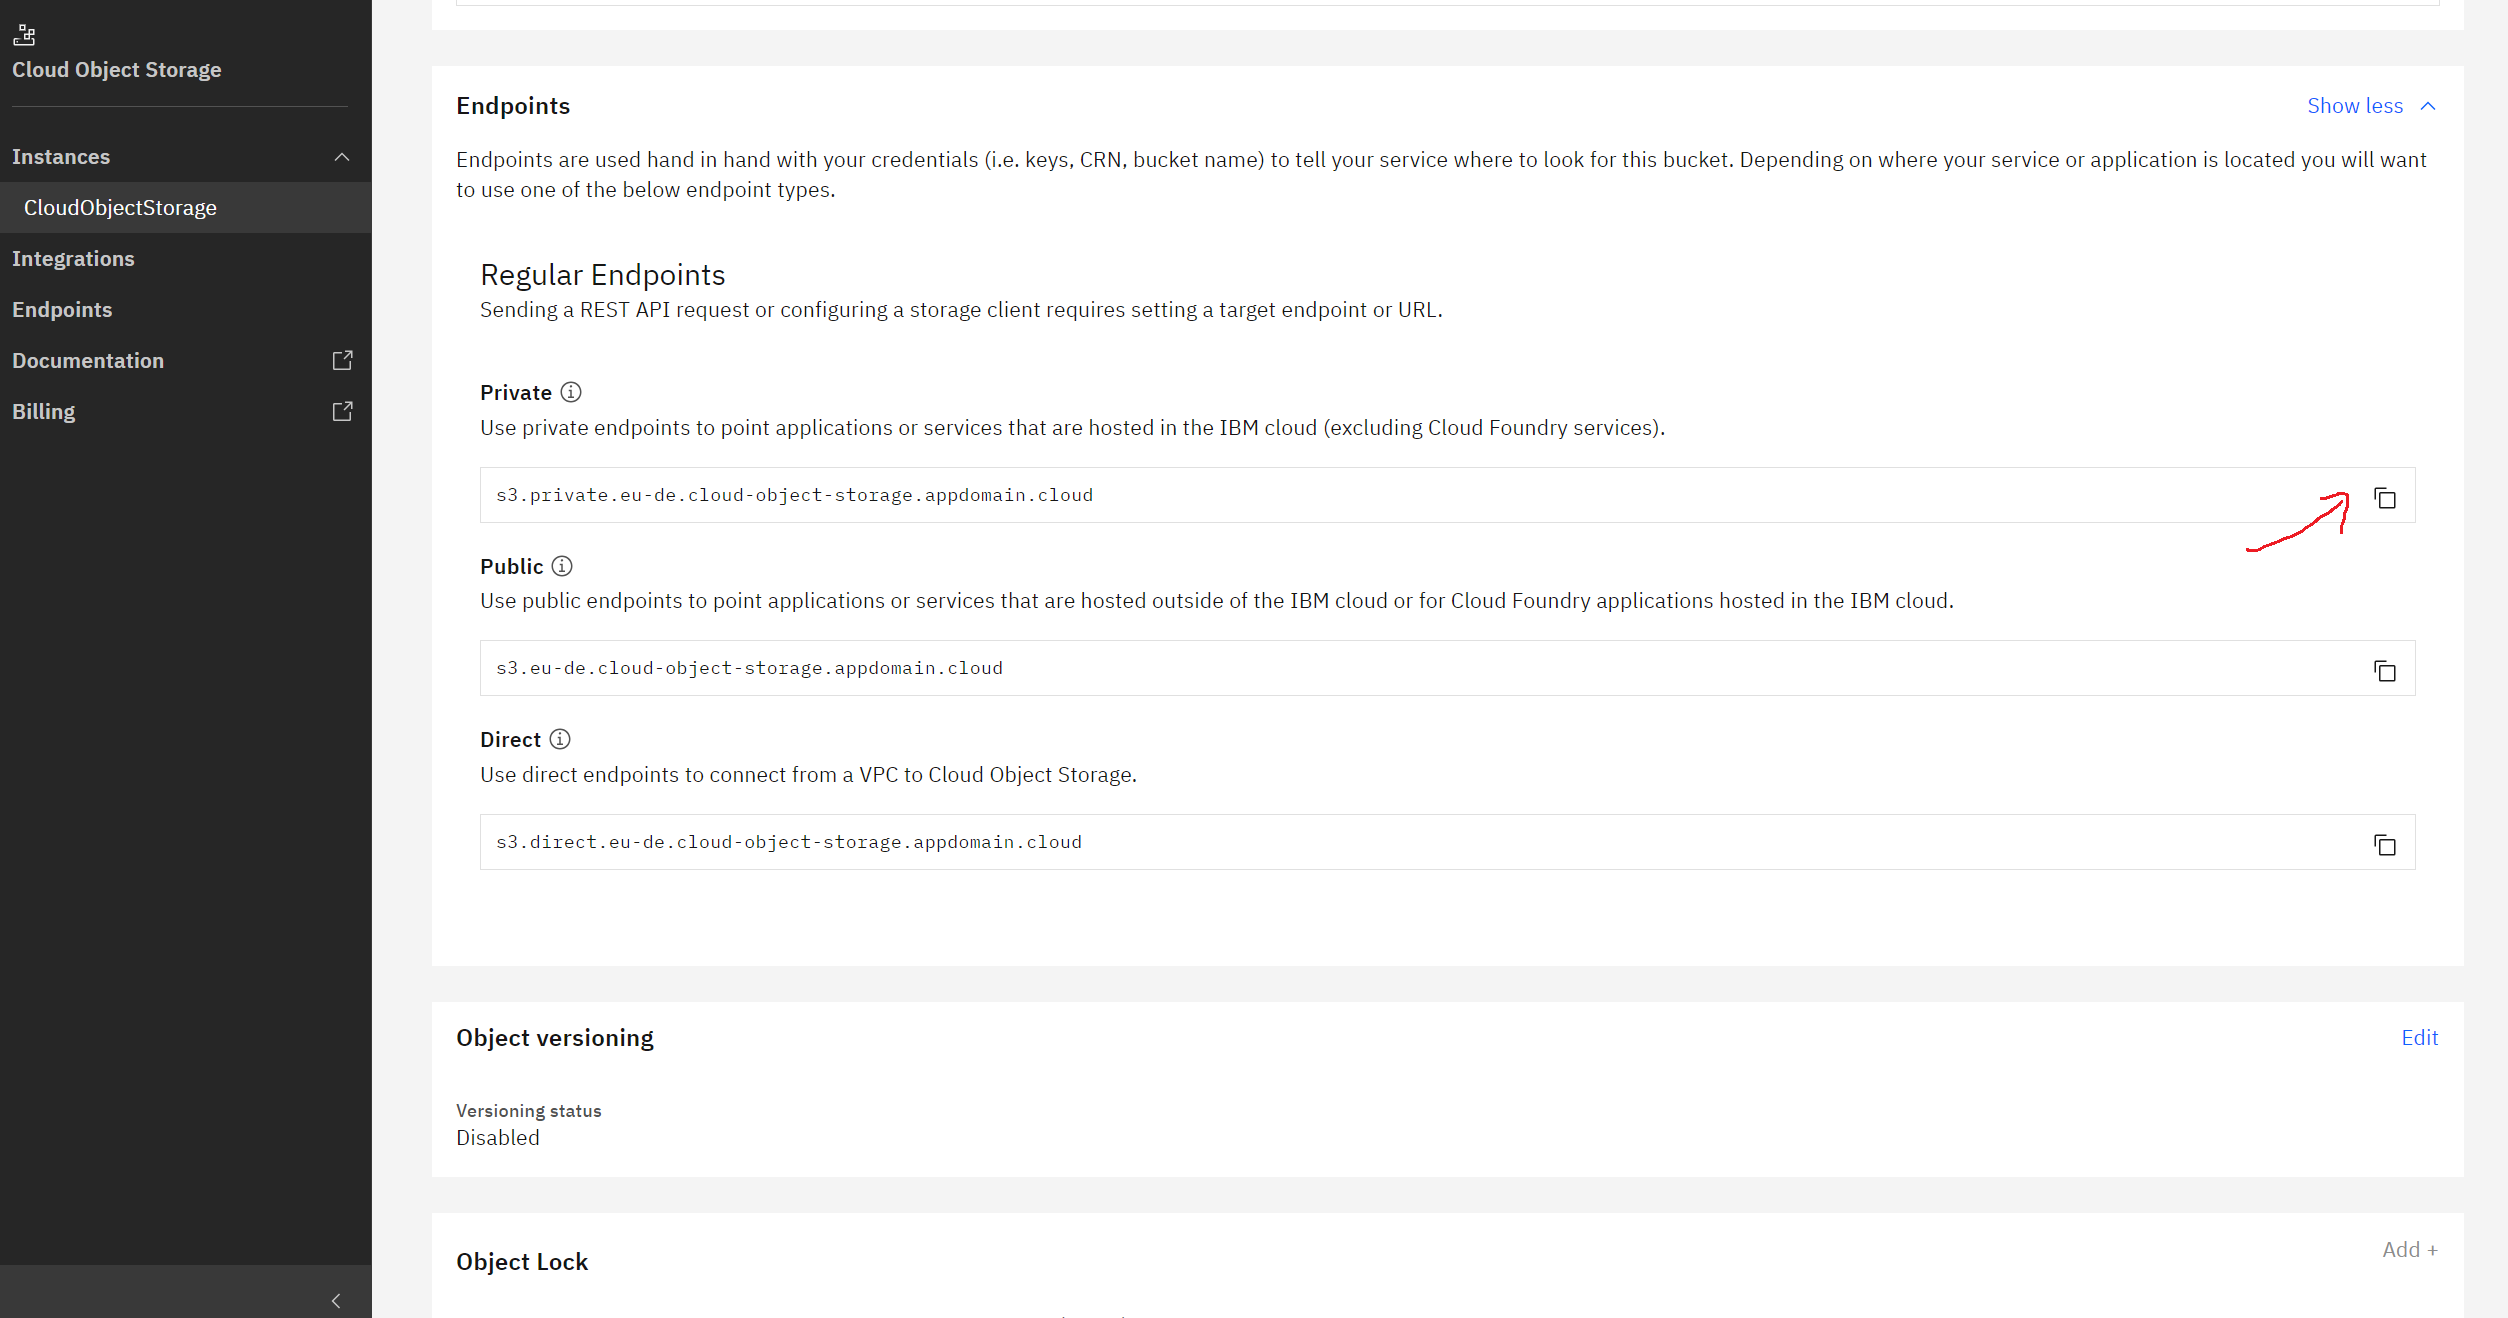

In [ ]:
#listing the buckets
try:
    for bucket in cos.list_buckets()['Buckets']:
        print(bucket['Name'])
except:
    print('The Credential key might not exist')

In [ ]:
# example with a kaggle dataset
import os
from tqdm import tqdm_notebook as tqdm

#path of the folder of whatever's inside to be uploaded:
TTV_path = '/kaggle/input/jellyfish-types/Train_Test_Valid'

bucket_name ='jellyfish'

if 'Contents' not in cos.list_objects(Bucket=bucket_name):
    for dirname, _, filenames in os.walk(TTV_path):
        for filename in tqdm(filenames):
#             print('/'.join(dirname.split('/')[5:])+'/'+filename)
            cos.upload_file(os.path.join(dirname, filename), bucket_name, '/'.join(dirname.split('/')[len(TTV_path.split('/')):])+'/'+filename)
print('now its MINE :^)')